In [16]:
# Import other dependencies
import pandas as pd
from datetime import datetime as dt 
import pprint

In [17]:
# More
import matplotlib.pyplot as plt 
import numpy as np 
from textblob import TextBlob
from wordcloud import WordCloud 
import re 


In [18]:
df = pd.read_csv('Tweets.csv')
df = df[['tweet_id', 'airline','name','retweet_count','text', 'tweet_created','latitude', 'longitude']]
df = df.rename(columns={'tweet_id':'id_str', 'tweet_created':'created'}) # changed to match output of actual twitter scrape
df.head()


,id_str,airline,name,retweet_count,text,created,latitude,longitude
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35.888455,-119.273781
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,37.770971,-119.941025
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,35.684863,-119.709299
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,37.061159,-119.279135
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,36.790587,-120.867752


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_str         14640 non-null  float64
 1   airline        14640 non-null  object 
 2   name           14640 non-null  object 
 3   retweet_count  14640 non-null  int64  
 4   text           14640 non-null  object 
 5   created        14640 non-null  object 
 6   latitude       14640 non-null  float64
 7   longitude      14640 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 915.1+ KB


In [20]:
def CleanFrame(df):
    df = df.drop_duplicates(subset='id_str')
    df['date'] = df['created'].str.split(' ').str[0]
    df = df.drop(columns=['created'])
    df['date'] = pd.to_datetime(df['date'])
    return df


In [21]:
df = CleanFrame(df)
df.head()

<ipython-input-20-01f0be2c30e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['created'].str.split(' ').str[0]


,id_str,airline,name,retweet_count,text,latitude,longitude,date
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,35.888455,-119.273781,2015-02-24
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,37.770971,-119.941025,2015-02-24
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,35.684863,-119.709299,2015-02-24
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,37.061159,-119.279135,2015-02-24
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,36.790587,-120.867752,2015-02-24


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14485 entries, 0 to 14639
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_str         14485 non-null  float64       
 1   airline        14485 non-null  object        
 2   name           14485 non-null  object        
 3   retweet_count  14485 non-null  int64         
 4   text           14485 non-null  object        
 5   latitude       14485 non-null  float64       
 6   longitude      14485 non-null  float64       
 7   date           14485 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1018.5+ KB


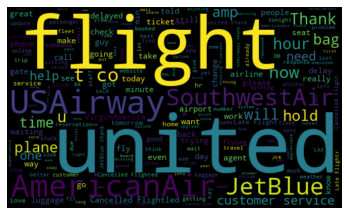

In [23]:
# Word cloud
words = ' '.join([twt for twt in df['text']])
cloud =WordCloud(width = 500, height = 300, random_state =21, max_font_size =119).generate(words)
plt.imshow(cloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

In [24]:
def CleanTweets(txt): 
    # remove @ username 
    # txt = re.sub(r'@[A-Za-z0-9)]+','', txt)
    
    # remove RT    
    txt = re.sub(r'RT[\s]+','',txt)
    
    # remove @ from username
    txt = txt.replace('@','')
    
    # remove # but leave txt
    txt = re.sub(r'#','', txt)
    
    # remove hyperlinks
    txt = re.sub(r'https?:\/\/\S+', '', txt)
    
    return txt

In [25]:
df['text'] = df['text'].apply(CleanTweets)
df.head()

,id_str,airline,name,retweet_count,text,latitude,longitude,date
0,5.703061e+17,Virgin America,cairdin,0,VirginAmerica What dhepburn said.,35.888455,-119.273781,2015-02-24
1,5.703011e+17,Virgin America,jnardino,0,VirginAmerica plus you've added commercials to...,37.770971,-119.941025,2015-02-24
2,5.703011e+17,Virgin America,yvonnalynn,0,VirginAmerica I didn't today... Must mean I ne...,35.684863,-119.709299,2015-02-24
3,5.703010e+17,Virgin America,jnardino,0,VirginAmerica it's really aggressive to blast ...,37.061159,-119.279135,2015-02-24
4,5.703008e+17,Virgin America,jnardino,0,VirginAmerica and it's a really big bad thing ...,36.790587,-120.867752,2015-02-24


In [26]:
# to get subjectivity 
def RateSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

# to get polarity
def RatePolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [27]:
def GetSentiment(num):
    if num < 0: 
        return 'negative' 
    elif num == 0:
        return 'neutral'
    else:
        return 'positive'

In [28]:
# Create Columns
df['Subjectivity'] = df['text'].apply(RateSubjectivity)
df['Polarity'] = df['text'].apply(RatePolarity)
df.head()

,id_str,airline,name,retweet_count,text,latitude,longitude,date,Subjectivity,Polarity
0,5.703061e+17,Virgin America,cairdin,0,VirginAmerica What dhepburn said.,35.888455,-119.273781,2015-02-24,0.000000,0.000000
1,5.703011e+17,Virgin America,jnardino,0,VirginAmerica plus you've added commercials to...,37.770971,-119.941025,2015-02-24,0.000000,0.000000
2,5.703011e+17,Virgin America,yvonnalynn,0,VirginAmerica I didn't today... Must mean I ne...,35.684863,-119.709299,2015-02-24,0.687500,-0.390625
3,5.703010e+17,Virgin America,jnardino,0,VirginAmerica it's really aggressive to blast ...,37.061159,-119.279135,2015-02-24,0.350000,0.006250
4,5.703008e+17,Virgin America,jnardino,0,VirginAmerica and it's a really big bad thing ...,36.790587,-120.867752,2015-02-24,0.383333,-0.350000


In [29]:
df['Sentiment'] = df['Polarity'].apply(GetSentiment)
df.head()

,id_str,airline,name,retweet_count,text,latitude,longitude,date,Subjectivity,Polarity,Sentiment
0,5.703061e+17,Virgin America,cairdin,0,VirginAmerica What dhepburn said.,35.888455,-119.273781,2015-02-24,0.000000,0.000000,neutral
1,5.703011e+17,Virgin America,jnardino,0,VirginAmerica plus you've added commercials to...,37.770971,-119.941025,2015-02-24,0.000000,0.000000,neutral
2,5.703011e+17,Virgin America,yvonnalynn,0,VirginAmerica I didn't today... Must mean I ne...,35.684863,-119.709299,2015-02-24,0.687500,-0.390625,negative
3,5.703010e+17,Virgin America,jnardino,0,VirginAmerica it's really aggressive to blast ...,37.061159,-119.279135,2015-02-24,0.350000,0.006250,positive
4,5.703008e+17,Virgin America,jnardino,0,VirginAmerica and it's a really big bad thing ...,36.790587,-120.867752,2015-02-24,0.383333,-0.350000,negative


In [31]:
df = df.sort_values(by=['Polarity'])


In [21]:
search_terms = ['vaccine','covid vaccine','covid-19 vaccine','pfizer', 'pfizer-biontech','moderna']

In [32]:
def KeyWord(search_terms, df):
    cond = list(map(df['text'].str.contains, search_terms))
    df['keyword'] = np.select(cond, search_terms, 'other')
    return df

In [33]:
airlines = df['airline'].unique()
airlines = ['us airways', 'southwest', 'united', 'american', 'delta',
       'virgin america']

In [34]:
df['text'] =df['text'].str.lower()

In [35]:
KeyWord(airlines,df)
df

,id_str,airline,name,retweet_count,text,latitude,longitude,date,Subjectivity,Polarity,Sentiment,keyword
10370,5.693467e+17,US Airways,BradHuff88,0,usairways 2 hours and counting waiting to get ...,40.760400,-73.987300,2015-02-21,1.000000,-1.0,negative,other
7926,5.689696e+17,Delta,thatsmypotpie,0,jetblue this is awful! flight out of jfk for o...,42.589960,-96.471110,2015-02-20,1.000000,-1.0,negative,other
13614,5.697993e+17,American,AebischerDrew,0,americanair thank you for the worst experience...,40.735500,-73.994600,2015-02-23,1.000000,-1.0,negative,american
10394,5.693360e+17,US Airways,BUsoccer,0,usairways worst trip ever! wish pilot would'v...,40.757200,-73.972000,2015-02-21,1.000000,-1.0,negative,other
13943,5.696882e+17,American,c_cgottlieb,0,americanair pathetic service,40.740900,-74.007500,2015-02-22,1.000000,-1.0,negative,american
...,...,...,...,...,...,...,...,...,...,...,...,...
8295,5.685238e+17,Delta,kbosspotter,0,jetblue should i check in my awesome bag on my...,51.258906,-96.809672,2015-02-19,1.000000,1.0,positive,other
5407,5.691347e+17,Southwest,allie_kaji621,0,southwestair great flight! and great view!,38.990944,-103.486960,2015-02-21,0.750000,1.0,positive,southwest
42,5.700163e+17,Virgin America,GottAmanda,0,virginamerica plz help me win my bid upgrade f...,36.269955,-119.922514,2015-02-23,0.400000,1.0,positive,other
13679,5.697536e+17,American,rgsager,0,americanair make sure u insure your luggage as...,40.763000,-73.972000,2015-02-22,0.888889,1.0,positive,american


In [1]:
import sqlite3
cxn = sqlite3.connect('trial.sqlite')

In [74]:
df.to_sql('airlines', cxn, if_exists='append', index = False)

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine


In [72]:
conn.close()

In [3]:
engine = create_engine('sqlite:///trial.sqlite')

In [4]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [5]:
print(Base.classes.keys())

['airlines']


In [6]:
airlines = Base.classes.airlines
session = Session(engine)

In [19]:
from flask import jsonify

In [10]:
def timed(session):
    lines = session.query(airlines.id_str, airlines.date, airlines.Sentiment, airlines.Polarity, airlines.retweet_count).all()

    id_str = [col[0] for col in lines]
    date = [col[1] for col in lines]
    sentiment = [col[2] for col in lines]
    polarity = [col[3] for col in lines]
    retweet_count = [col[4] for col in lines]
    
    for col in lines:
        id_str = col[0]
        date = col[1]
        
    #favourite_count = [col[5] for col in lines]

    timeline = {'timeline': [{
          'id_str': id_str, 
        'date': date, 
        'sentiment': sentiment,
        'polarity': polarity,
        'retweet_count': retweet_count  
    }]}
    return timeline


'''
@app.route("/timeline")
def timeline():
    lines = session.query(airlines.id_str, airlines.date, airlines.Sentiment, airlines.Polarity, airlines.retweet_count).all()
    time_line = []
    for col in lines:
        time_dict = {
        'id_str': col[0], 
        'date': col[1], 
        'sentiment': col[2],
        'polarity': col[3],
        'retweet_count': col[4]  
    }
        time_line.append(time_dict)
    return jsonify(time_line)
    
'''
    

In [9]:
tim = timed(session)
tim

{'timeline': [{'id_str': [5.69346721173656e+17,
    5.69229135752643e+17,
    5.67722664597287e+17,
    5.68788849440063e+17,
    5.69299492127842e+17,
    5.69654204375175e+17,
    5.67806786331234e+17,
    5.69623359304004e+17,
    5.69614361574158e+17,
    5.70195373018505e+17,
    5.68794464749265e+17,
    5.69211645710496e+17,
    5.69908918421299e+17,
    5.69217317315355e+17,
    5.68852204750135e+17,
    5.69280669593039e+17,
    5.69603523954016e+17,
    5.68102187294974e+17,
    5.69666470482805e+17,
    5.69167514300785e+17,
    5.69721039158174e+17,
    5.69881449249317e+17,
    5.69670147893383e+17,
    5.69715233549369e+17,
    5.70253865066603e+17,
    5.69629882323497e+17,
    5.6963838137591e+17,
    5.67872411418247e+17,
    5.70066450796257e+17,
    5.70136130126897e+17,
    5.69724245963444e+17,
    5.6942946878115e+17,
    5.69522879764808e+17,
    5.69337520573391e+17,
    5.70143200935064e+17,
    5.69335624056091e+17,
    5.69457108355289e+17,
    5.677823468336

In [22]:
session.close()

In [36]:
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy import Column, Integer, String, Float

In [37]:
# Create Class

class Tweets(Base):
    __tablename__ = 'tweets'
    id_str = Column(String(255), primary_key=True)
    airline = Column(String(255))
    name = Column(String(255))
    retweet_count = Column(Integer)
    text = Column(String(1800))
    latitude = Column(Float)
    longitude = Column(Float)
    date = Column(String(255))
    Subjectivity = Column(Float)
    Polarity = Column(String(Float))
    Sentiment = Column(String(255))
    keyword = Column(String(255))
    

In [40]:
engine = create_engine('sqlite:///trial2.sqlite')
conn = engine.connect()

In [42]:
Base.metadata.create_all(conn)

TypeError: %d format: a number is required, not VisitableType

In [ ]:
session = Session(bind=engine)

# certain host

In [13]:
from google.cloud import storage
import sqlite3
import pandas as pd
import numpy as np
from datetime import datetime as dt


In [46]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from config import db

In [47]:
engine = create_engine(db, echo=False)    

In [48]:
session = Session(engine)

In [49]:
Base = automap_base()
Base.prepare(engine, reflect=True)   

In [50]:
cxn = engine.connect()
df.to_sql(name='airlines', con=engine, if_exists='append', index=True)
# works! 

In [ ]:
session.close()